# Class 12 Solutions — Word Shift Graphs — Comparing Cities

In this notebook, we will be comparing how people talk about Seattle vs. other cities — Portland, Chicago, LA, or Beijing — on Reddit. To do so, we will be using the `Shifterator` package, and we will be making word shift graphs.

What we need to make word shift graphs with `Shifterator` is **two dictionaries for our two corpora** — dictionaries that have keys as words and values as how many times the words show up in the corpora. To make these dictionaries, we will go over how to use `Counter()` and how to transform Pandas DataFrame columns into dictionaries of word counts.

## Update a Counter

In [1]:
from collections import Counter

In [2]:
fruits = ["apple", "apple", "banana", "kiwi", 'kiwi', "kiwi", 'banana']

By using Counter, we can count items in a collection, such as a list or dictionary, and return a dictionary of values and counts.

In [3]:
Counter(fruits)

Counter({'apple': 2, 'banana': 2, 'kiwi': 3})

We can also add items to a Counter with the `update()` method.

In [4]:
# Make an empty counter
fruit_counter = Counter()

In [5]:
# Add to it!
fruit_counter.update(fruits)

In [6]:
fruit_counter

Counter({'apple': 2, 'banana': 2, 'kiwi': 3})

We can also add a couple of oranges and a banana to our counter.

In [7]:
fruit_counter.update(['orange', 'orange', 'banana'])

In [8]:
fruit_counter

Counter({'apple': 2, 'banana': 3, 'kiwi': 3, 'orange': 2})

In [9]:
fruit_counter.most_common(2)

[('banana', 3), ('kiwi', 3)]

## Make a Word Tokenizer

Make sure to run all of these cells and create these variables. If you're unsure, check your Variable Inspector.

In [10]:
from collections import Counter
import re

In [11]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 've', 'll', 'amp']

Complete the code below to create a function that tokenizes any text and returns a list of words.

In [12]:
def tokenize_words(text):
    lowercase_text = text.lower()
    split_words = re.split("\W+", lowercase_text)
    meaningful_words = [word for word in split_words if word not in stopwords]
    return meaningful_words

In [13]:
tokenize_words("I love Seattle!!!")

['love', 'seattle', '']

## Seattle vs. Portland

In [14]:
import pandas as pd
pd.options.display.max_colwidth = 400

In [15]:
seattle_df = pd.read_csv('../reddit-data/Seattle-Reddit-Submissions-1k.csv', parse_dates=['date'])

Examine 10 random posts

In [16]:
seattle_df.sample(10)

,author,date,title,selftext,subreddit,score
570,Soundpulse5,2018-08-12 21:21:31+00:00,[Post Series Thread] Seattle sweeps the Astros at home in a 4 game series for the first time ever.,[Game 1](http://www.espn.com/mlb/boxscore?gameId=380809118)\n\n[Game 2](http://www.espn.com/mlb/boxscore?gameId=380810118)\n\n[Game 3](http://www.espn.com/mlb/boxscore?gameId=380811118)\n\n[Game 4](http://www.espn.com/mlb/boxscore?gameId=380812118),baseball,2910
421,forthefour,2019-04-26 21:03:32+00:00,"There was a guy in Seattle parading a sign that read ""Who is Jesus to you?"" I said as I walked by ""No one."" Then he yelled as I walked away ""Well, NO ONE loves you!""",He didnt realize what he said and I found it hilarious. He meant to tell me jesus loved me but he ended up just mocking my lack of friends apparently. \n\nKinda hurt.,atheism,3784
82,hunter_mark,2020-06-13 21:19:04+00:00,Fox News Removes a Digitally Altered Image of Seattle Protests,NaN,politics,1093
461,maohaze,2019-03-28 21:37:09+00:00,Expanse Crew in Seattle,NaN,TheExpanse,1795
762,DriesMertens,2018-03-20 11:41:40+00:00,[OC] I’ve tallied the number of cards shown in the 5 most recent instances of 141 different club rivalries around the world to try to determine the “craziest” rivalries in world football.,"I’ve tallied the number of yellow and red cards shown in the most recent 5 matches between a collection of 141 rival clubs (in all competitions). My main goal here was to use the cards-per-match data to figure out which rivalries are the “craziest”. I know it’s nowhere near the best metric for this purpose, but it was relatively easy to obtain all the data using this metric and I think it’s st...",soccer,1545
1485,LarBrd33,2016-04-13 01:57:58+00:00,"I took over a bottom team 7 years into a dynasty keeper league. Using ""Hinkie Methods"" I dominated so thoroughly they kicked me out.","**WARNING: THIS IS LONG** ... Fantasy basketball war stories are probably excruciatingly boring, but this one is somewhat unique so I thought a few people might be entertained by it.\n\n**League Format Context:** I'm a regular at a popular Celtics-based Forum. Way back in 2007, some members there started a Points-based 20 team dynasty keeper league. 16 roster spots (PG, PG, SG, SG, SF, SF,...",fantasybball,1408
1588,Jobbe03,2015-09-23 13:28:42+00:00,Seahawks' safety Kam Chancellor is planning to return to Seattle today,NaN,nfl,2801
649,sociopathic_zebra,2018-06-08 18:10:15+00:00,"Cool Seattle, WA [1920 x 1197]",NaN,CityPorn,2771
1667,tazcel,2015-02-28 14:33:03+00:00,"Army Capt. William D. Swenson of Seattle, Washington receiving his Medal of Honor",NaN,MURICA,2524
877,comebackjoeyjojo,2017-11-22 00:18:25+00:00,"Until we get municipal broadband here in Seattle, we must fight to protect New Neutrality",NaN,SeattleWA,41898


In [17]:
pdx_df = pd.read_csv('../reddit-data/Portland-Reddit-Submissions-1k.csv', parse_dates=['date'])

Examine 10 random posts

In [18]:
pdx_df.sample(10)

,author,date,title,selftext,subreddit,score
113,habichuelacondulce,2020-07-20 22:39:51+00:00,Trump threatens federal law enforcement crackdown in NYC after ‘fantastic job’ in Portland,NaN,nyc,1254
33,Fr1sk3r,2020-09-13 14:15:13+00:00,Trump: Extrajudicial Killing Of Portland Shooting Suspect Is ‘The Way It Has To Be’,NaN,politics,1889
545,PeroPero1,2019-03-02 17:22:23+00:00,"[Josh Lewenberg] Kawhi Leonard on his recent clutch playmaking: ""There’s 82 games and for me these are just practices and playoffs is when it’s time to lace them up.​""","[Video of post-game interview vs. Portland Blazers](https://streamable.com/sruys)\n\n[Original tweet made by JLew when Kawhi was asked about the recent clutch performances](https://twitter.com/JLew1050/status/1101712765549531136)\n\n&gt; Kawhi Leonard: ""There’s 82 games and for me these are just practices and playoffs is when it’s time to lace them up.​"" \n\n&amp;#x200B;",nba,2941
774,dingdongditch122,2018-02-15 03:17:41+00:00,The Houston Rockets are the 1st seed in the West,"Same record as warriors with a 2-1 head to head tie-breaker\n\nWarriors have never been lower than first seed this late into the season during the Kerr era.\n\nIf the warriors win against the Portland Trailblazers, they'll pass the rockets for 1st again",nba,2802
801,Meunderwears,2018-01-10 14:32:51+00:00,Portland letter carriers (1929),NaN,TheWayWeWere,1006
814,urfaselol,2017-12-10 05:22:53+00:00,[Post Game Thread] The Houston Rockets come back from 14 down in the fourth to beat the Portland Trailblazers 124-117,**[](/HOU) HOU**|**Min**|**FG**|**FT**|**3PT**|**+/-**|**OR**|**Reb**|**A**|**Blk**|**Stl**|**TO**|**PF**|**Pts**|\n|:---|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|\nC. Capela|21:54|4-5|3-6|0-0|-2|2|10|2|0|2|1|3|11|\nJ. Harden|37:06|16-29|12-14|4-7|+7|1|8|3|0|2|2|2|48|\nC. Paul|34:45|8-14|7-8|1-4|+12|0|3|7|0|2|3|2|24|\nT. Ariza|33:39|4-7|2-2|3-4|+17|1|2|0|0|4|0|2|13|\nR....,nba,1249
80,werdmouf,2020-07-22 18:40:47+00:00,"Portland protests day 55. Protesters are now equipped with helmets, full face masks, goggles, shields, umbrellas, and leaf blowers.",NaN,PublicFreakout,11550
1460,[deleted],2009-09-07 22:14:52+00:00,"I have crohn's disease. I shat my pants outside of ""Plaid Pantry"" because they wouldn't let me use the employee bathroom.","here's the email I sent to customer service:\n\nTo Whom It May Concern:\n\n I am writing to tell you about an incident that occurred today that troubled me deeply about your company and the practices of its managers. I am a regular shopper at the Plaid Pantry in Portland, Oregon off of 1st Ave. Today, September 07, Labor Day, I was driving home from my job and had a bit of a problem. You see, ...",reddit.com,1919
1454,rspix000,2012-01-14 14:38:51+00:00,"Portland joins list of cities voting to end corporate personhood. Props to Occupy Portland, mayor, and all who worked on it.",NaN,occupywallstreet,1012
313,pjmccartney,2019-07-16 16:08:09+00:00,My mom took this during the Portland rally. I think it's very meme-able.,NaN,YangForPresidentHQ,1680


## Transform a Series Into a List

We can transform a column into a list with `.to_list()`

In [19]:
seattle_df['title'].to_list()

['Seattle Votes to Decriminalize Psilocybin and Similar Substances',
 'Diamantenhände (from Seattle) 💎👐 German market is open 🇩🇪',
 'Anyone else enjoy comparing real Seattle to the game? Here I am at Pioneer Place.',
 'Ace Hardware in Lake City (Seattle) enforces their mask policy',
 'Diamantenhände (from Seattle) 💎👐 German market is open 🇩🇪',
 'Fight over mask mandate in a Seattle Ace Hardware.',
 'Ace Hardware Employee in Seattle, WA. tries to enforce "Mask Mandate"... with a bat',
 '[Arnold] Seattle Seahawks’ Jamal Adams not expected to participate in mandatory minicamp as he looks to sign a contract extension',
 'Diamantenhände (from Seattle) 💎👐 German market is open 🇩🇪',
 'An eagle taking a walk in the rain at low tide in West Seattle.',
 "New 315' ship-to-shore cranes inbound to Seattle yesterday aboard the Zhen Hua 36 - cranes are welded to the deck and the ship is a former tanker, with 50' of ballast tanks below the water",
 'Dicks burgers in Seattle offering a livable wage, gr

In [20]:
seattle_posts = seattle_df['title'].to_list()

In [21]:
pdx_posts = pdx_df['title'].to_list()

Let's loop through `seattle_posts`, tokenize each post, and print the list of tokenized words.

In [23]:
for text in seattle_posts:
    print(tokenize_words(text))

['seattle', 'votes', 'decriminalize', 'psilocybin', 'similar', 'substances']
['diamantenhände', 'seattle', 'german', 'market', 'open', '']
['anyone', 'else', 'enjoy', 'comparing', 'real', 'seattle', 'game', 'pioneer', 'place', '']
['ace', 'hardware', 'lake', 'city', 'seattle', 'enforces', 'mask', 'policy']
['diamantenhände', 'seattle', 'german', 'market', 'open', '']
['fight', 'mask', 'mandate', 'seattle', 'ace', 'hardware', '']
['ace', 'hardware', 'employee', 'seattle', 'wa', 'tries', 'enforce', 'mask', 'mandate', 'bat']
['', 'arnold', 'seattle', 'seahawks', 'jamal', 'adams', 'expected', 'participate', 'mandatory', 'minicamp', 'looks', 'sign', 'contract', 'extension']
['diamantenhände', 'seattle', 'german', 'market', 'open', '']
['eagle', 'taking', 'walk', 'rain', 'low', 'tide', 'west', 'seattle', '']
['new', '315', 'ship', 'shore', 'cranes', 'inbound', 'seattle', 'yesterday', 'aboard', 'zhen', 'hua', '36', 'cranes', 'welded', 'deck', 'ship', 'former', 'tanker', '50', 'ballast', 'tank

Let's make an empty Counter, loop through the Reddit posts, and add the tokenized words to the Counter for each post.

In [24]:
seattle_counts = Counter()

for post in seattle_posts:
    words = tokenize_words(post)
    seattle_counts.update(words)

In [26]:
pdx_counts = Counter()

for post in pdx_posts:
    words = tokenize_words(post)
    pdx_counts.update(words)

Check to see if you made the dictionaries correctly:

In [27]:
seattle_counts

Counter({'seattle': 1551,
         'votes': 7,
         'decriminalize': 3,
         'psilocybin': 1,
         'similar': 1,
         'substances': 1,
         'diamantenhände': 4,
         'german': 4,
         'market': 10,
         'open': 12,
         '': 1170,
         'anyone': 8,
         'else': 6,
         'enjoy': 9,
         'comparing': 1,
         'real': 16,
         'game': 78,
         'pioneer': 2,
         'place': 13,
         'ace': 5,
         'hardware': 3,
         'lake': 7,
         'city': 76,
         'enforces': 1,
         'mask': 3,
         'policy': 3,
         'fight': 5,
         'mandate': 2,
         'employee': 3,
         'wa': 93,
         'tries': 1,
         'enforce': 1,
         'bat': 4,
         'arnold': 1,
         'seahawks': 85,
         'jamal': 1,
         'adams': 1,
         'expected': 5,
         'participate': 1,
         'mandatory': 1,
         'minicamp': 1,
         'looks': 15,
         'sign': 15,
         'contract': 5,
   

## Word Shift Graphs — Proportion Shift

Nice! Now that we have our two dictionaries, we can use `Shifterator`.

## Install and Import Shifterator

In [ ]:
!pip install shifterator

In [28]:
import shifterator as sh

import warnings
warnings.filterwarnings("ignore")

> The easiest word shift graph that we can construct is a proportion shift. If 𝑝(1)𝑖 is the relative frequency of word 𝑖 in the first text, and 𝑝(2)𝑖 is its relative frequency in the second text, then the proportion shift calculates their difference:

> 𝛿𝑝𝑖=𝑝(2)𝑖−𝑝(1)𝑖.
> If the difference is positive (𝛿𝑝𝑖>0), then the word is relatively more common in the second text. If it is negative (𝛿𝑝𝑖<0), then it is relatively more common in the first text. We can rank words by this difference and plot them as a word shift graph.

## 🛑  Pause!
Before you run this cell, take a few minutes and make predictions about what words you think are going to be the most relatively frequent in Seattle Reddit posts and Portland Reddit posts. Jot down a few thoughts.

In [ ]:
# Predictions and thoughts

## 🚦 Go!

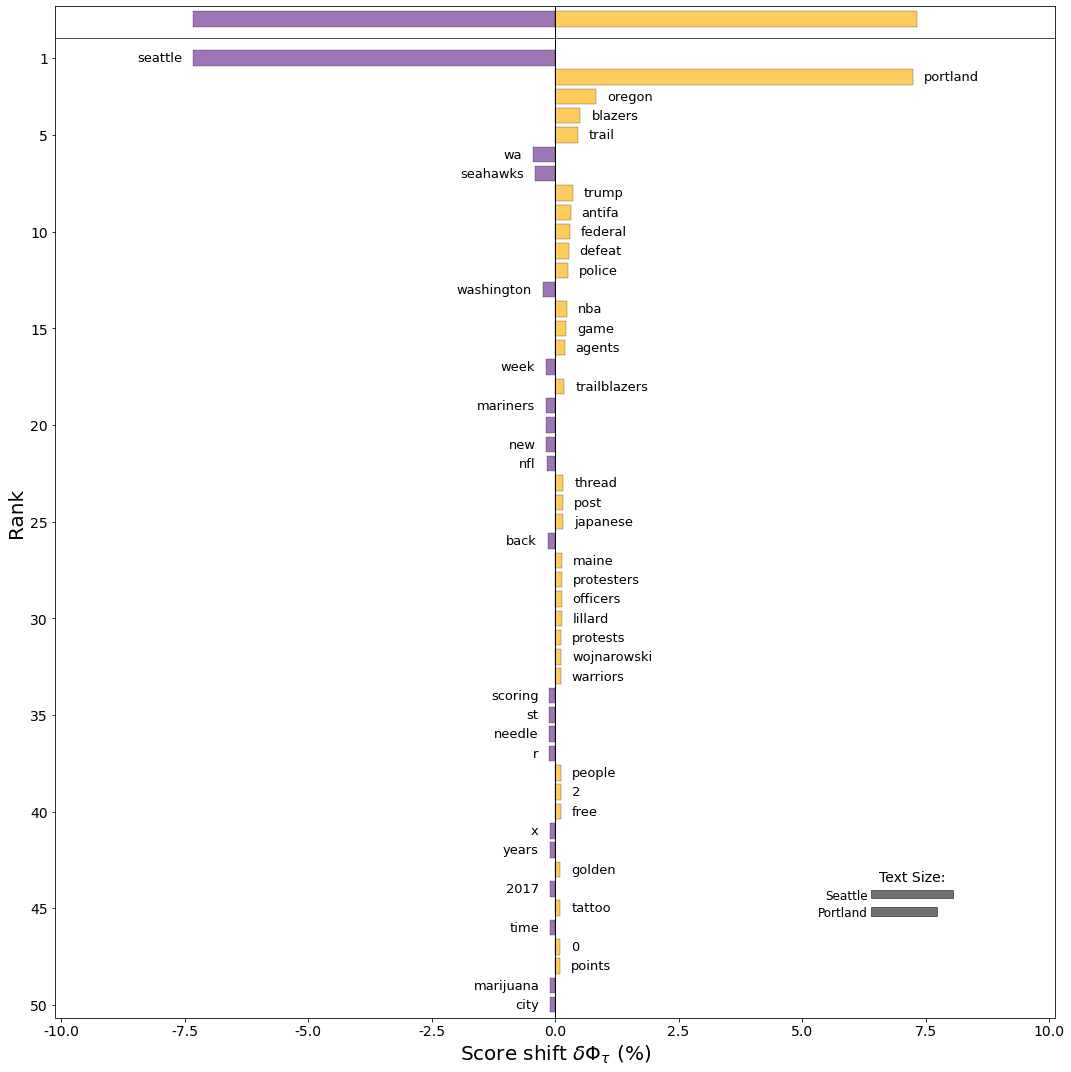

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [30]:
proportion_shift = sh.ProportionShift(type2freq_1 = seattle_counts,
                                        type2freq_2= pdx_counts)

proportion_shift.get_shift_graph(system_names = ['Seattle', 'Portland'],  width=15, height=15, cumulative_inset=False,  top_n = 50)

Check to see where certain words show up in the Seattle Reddit data:

In [32]:
word_filter = seattle_df['title'].str.contains('needle', case=False)
seattle_df[word_filter]

,author,date,title,selftext,subreddit,score
61,zerohubi,2020-07-23 17:04:58+00:00,"Newest team in the NHL, Seattle Kraken, revealed their logos. Anchor is the Space Needle.",NaN,DesignPorn,23558
198,Zonephysics1,2019-09-30 13:31:43+00:00,Space Needle in Seattle over clouds looks like the cloud city from Star Wars,NaN,pics,3501
280,NCGryffindog,2019-08-07 14:08:58+00:00,This collectibles cabinet at the Seattle Space Needle!,NaN,RetroFuturism,2160
381,reeveb,2019-05-26 12:54:30+00:00,25 years in Seattle and finally got up to the Space Needle...,NaN,Seattle,1080
393,t-williams,2019-05-19 05:52:54+00:00,Space Needle Moonrise Tonight in Seattle [OC],NaN,CityPorn,3738
420,earthmoonsun,2019-04-27 11:47:22+00:00,Seattle Space Needle - Tristan Zhou [2500x3125],NaN,ArchitecturePorn,1357
580,Harry_W_99,2018-08-08 14:21:14+00:00,"Silk Road tattoo by Tascar at Under the needle, Seattle",NaN,tattoos,1166
705,MafHoney,2018-05-01 15:41:10+00:00,"PNW Love - finished last night by Eli at Slave To The Needle - Seattle, WA",NaN,tattoos,1137
788,Hativeonius,2018-02-27 13:13:04+00:00,"Seattle Times' Space Needle, April 1962",NaN,RetroFuturism,1498
883,MadMoosee,2017-11-11 11:35:57+00:00,Space Needle in Seattle over clouds looks like the cloud city from Star Wars,NaN,pics,83172


Check to see where certain words show up in the PDX Reddit data:

In [33]:
word_filter = pdx_df['title'].str.contains('maine', case=False)
pdx_df[word_filter]

,author,date,title,selftext,subreddit,score
245,Theseberries,2019-09-23 13:50:40+00:00,"(I ate) Lobster off the coast of Portland, Maine",NaN,FoodPorn,1379
316,mrXlee,2019-07-15 16:54:24+00:00,"Pretty sure this belongs here..(Portland, Maine)",NaN,ThatLookedExpensive,2188
436,secondcomposition,2019-05-11 13:49:07+00:00,"Fort Gorges, an abandoned military fort off Portland, Maine [4411x4411] [OC]",NaN,AbandonedPorn,1311
482,OriginalNameHere0,2019-04-14 15:23:55+00:00,"Abandoned Mansion in Portland, Maine",NaN,AbandonedPorn,1233
534,redheadedfury,2019-03-10 12:46:55+00:00,"Couldn’t leave Maine without a lobster roll! Gilberts Chowder House, Portland ME",NaN,FoodPorn,6903
564,aliencircusboy,2018-09-28 18:49:19+00:00,"Protesters are cramming into Sen. Susan Collins' office in Portland, Maine",NaN,politics,2887
662,DownEastBeast,2018-06-11 01:47:21+00:00,Cute little mountains tattooed by Airynn Monroe at Wicked Good Ink in Portland Maine,NaN,tattoos,4077
674,JewBoySandler,2018-06-01 01:41:00+00:00,"Off the coast of Portland, Maine",NaN,AccidentalWesAnderson,3267
713,DownEastBeast,2018-04-20 00:11:47+00:00,Flowers by Airynn from Wicked Good Ink in Portland Maine,NaN,tattoos,4289
794,Flannel_V,2018-01-17 11:06:06+00:00,"PORTLAND, MAINE POLICE OFFICER Zahra Munye Abu. [FROM SOMALIA] IS ARRESTED BY WORCESTER, MA POLICE. CHARGES: Include assault and battery, resisting arrest, disorderly conduct, disturbing the peace and trespassing. ALL LOCAL MEDIA SILENT ON THE FACTS!",NaN,The_Donald,2717


### Top 50 Words with Highest Relevant Frequency for Portland

To sort the words by score, we can use `.get_shift_scores() with a Counter. To select just the top 50, we need to use list slicing.

In [34]:
Counter(proportion_shift.get_shift_scores()).most_common()[:50]

[('portland', 0.07243831830547537),
 ('oregon', 0.00830833599951954),
 ('blazers', 0.005134875125281483),
 ('trail', 0.004611599322641672),
 ('trump', 0.003542952254356043),
 ('antifa', 0.0031361747804154153),
 ('federal', 0.003040611902914426),
 ('defeat', 0.0027457479490992347),
 ('police', 0.002653720345679207),
 ('nba', 0.00239498247387884),
 ('game', 0.002157290530591698),
 ('agents', 0.0019369435257642722),
 ('trailblazers', 0.001842540660071098),
 ('thread', 0.0016782608926214203),
 ('post', 0.0016165040735196254),
 ('japanese', 0.0015441966708324604),
 ('maine', 0.0014381384484036168),
 ('protesters', 0.001399692342773161),
 ('officers', 0.0013309202141669574),
 ('lillard', 0.001307609500695618),
 ('protests', 0.0012575080383294926),
 ('wojnarowski', 0.0012481727052094536),
 ('warriors', 0.0011759205411798039),
 ('people', 0.0011095236748467465),
 ('2', 0.0011072036512311154),
 ('free', 0.0010896929967988535),
 ('golden', 0.001057046950207475),
 ('tattoo', 0.0010512468911683978

### Top 50 Words with Highest Relevant Frequency for Seattle

To sort the words by score, we can use `.get_shift_scores() with a Counter. To select just the bottom 50, we need to use list slicing.

In [35]:
Counter(proportion_shift.get_shift_scores()).most_common()[-50:]

[('told', -0.0005990080020929065),
 ('coffee', -0.0006095033470207608),
 ('sounders', -0.0006095033470207608),
 ('qb', -0.0006095033470207608),
 ('rainier', -0.0006211587037564305),
 ('ban', -0.000622318715564246),
 ('every', -0.0006269587627955079),
 ('per', -0.0006456294290355857),
 ('real', -0.0006456294290355857),
 ('ever', -0.0006479494526512166),
 ('til', -0.000651429488074663),
 ('minimum', -0.0006572847857712555),
 ('wage', -0.0006572847857712555),
 ('need', -0.0006829155228582261),
 ('old', -0.0006863955582816723),
 ('said', -0.0006945708795938959),
 ('amazon', -0.0007050662245217501),
 ('statue', -0.0007167215812574199),
 ('wilson', -0.0007178815930652355),
 ('re', -0.0007341769970321669),
 ('first', -0.0007399770560712443),
 ('photo', -0.0007656630318157301),
 ('6', -0.0007796384121670309),
 ('d', -0.000792453780710516),
 ('plane', -0.0008122844587584092),
 ('morning', -0.0008146044823740401),
 ('4', -0.0008204045414131174),
 ('15', -0.0008623859211245348),
 ('found', -0.000

## 🛑  Interpretation & Analysis

What kind of claims could you make about the Seattle vs. Reddit posts based on the word shift graph of relative word frequency? Try to formulate it in one or two sentences.

In [ ]:
# Your claims here

## Save a Word Shift Graph

To save a word shift graph, we simply need to add a `filename`.

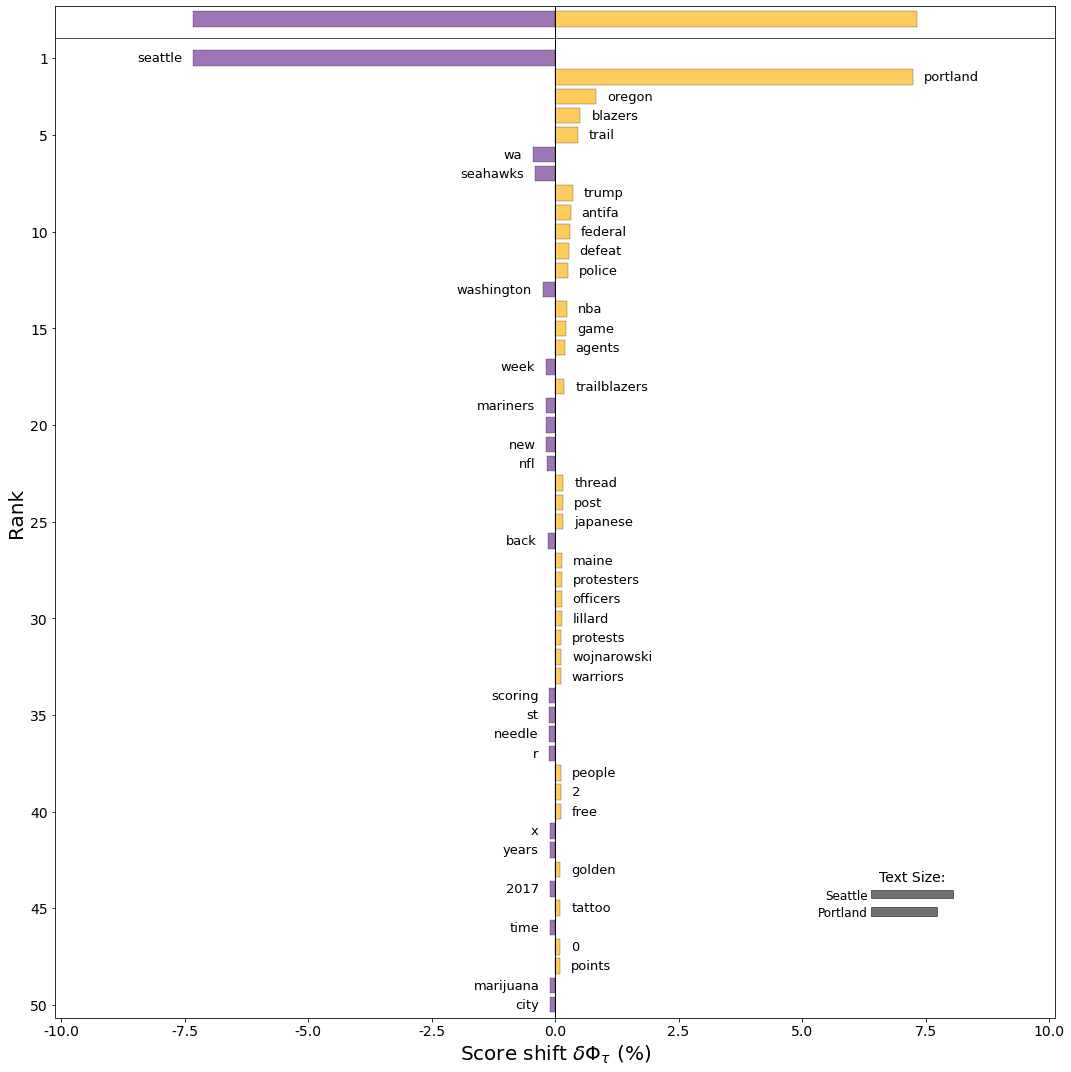

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [36]:
proportion_shift = sh.ProportionShift(type2freq_1 = seattle_counts,
                                        type2freq_2= pdx_counts)

proportion_shift.get_shift_graph(system_names = ['Seattle', 'Portland'],  width=15, height=15, cumulative_inset=False,  top_n = 50, filename='SeattlevPDX.png')

## Word Shift Graph — Entropy

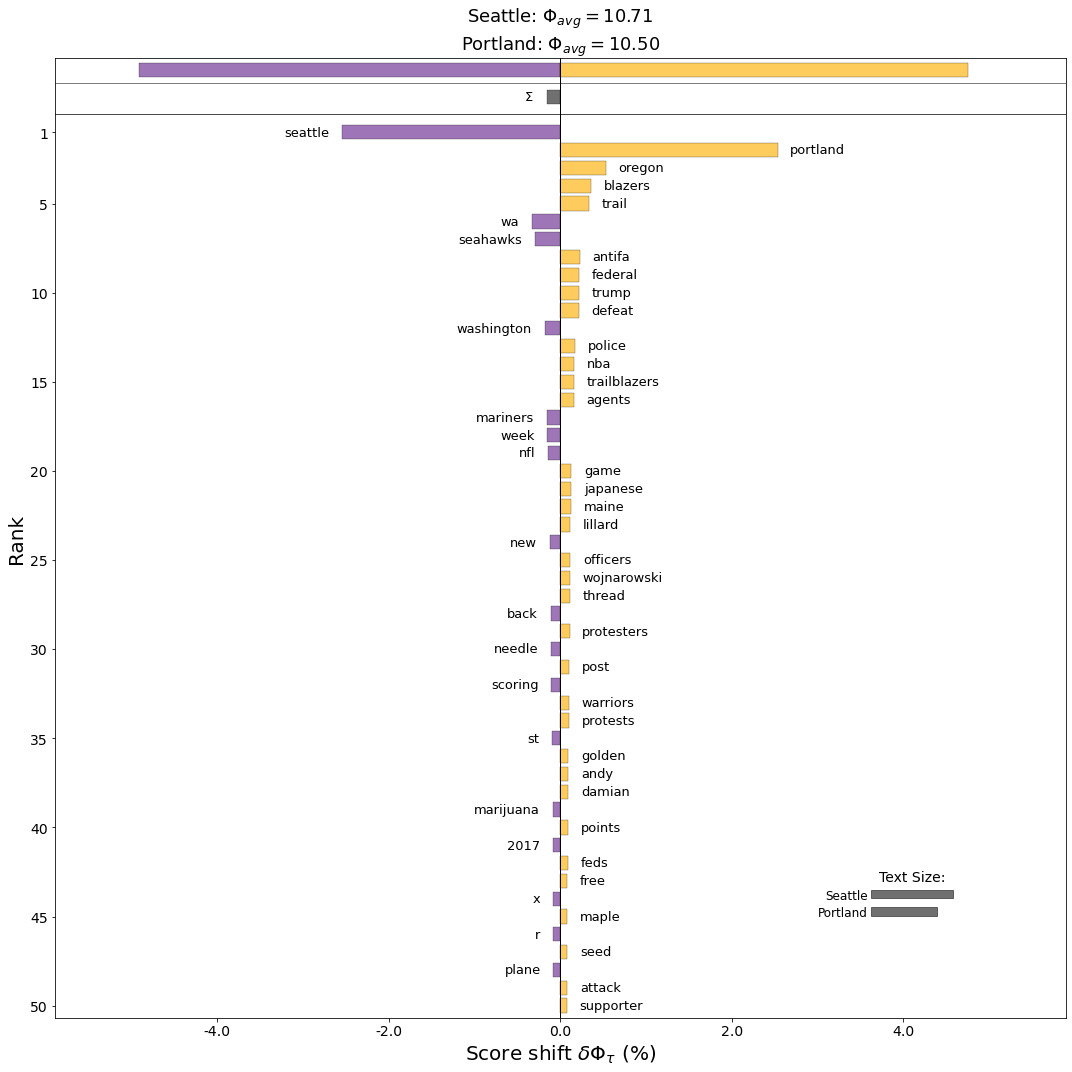

<AxesSubplot:title={'center':'Seattle: $\\Phi_{avg}=$10.71\nPortland: $\\Phi_{avg}=$10.50'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [37]:
entropy_shift = sh.EntropyShift(type2freq_1 = seattle_counts,
                                type2freq_2= pdx_counts,
                                base=2)

entropy_shift.get_shift_graph(system_names = ['Seattle', 'Portland'],  width=15, height=15, cumulative_inset=False,  top_n = 50)

## Word Shift Graph — Sentiment Analysis

We can also use a sentiment lexicon to see which corpora is more or less positive, and we can see which words contribute to that score. Here we will use the labMT Sentiment Lexicon, where 1 is the least happy and 9 is the most happy.

In the graph below, the `type2freq_2` dictionary will be the "reference" corpora.

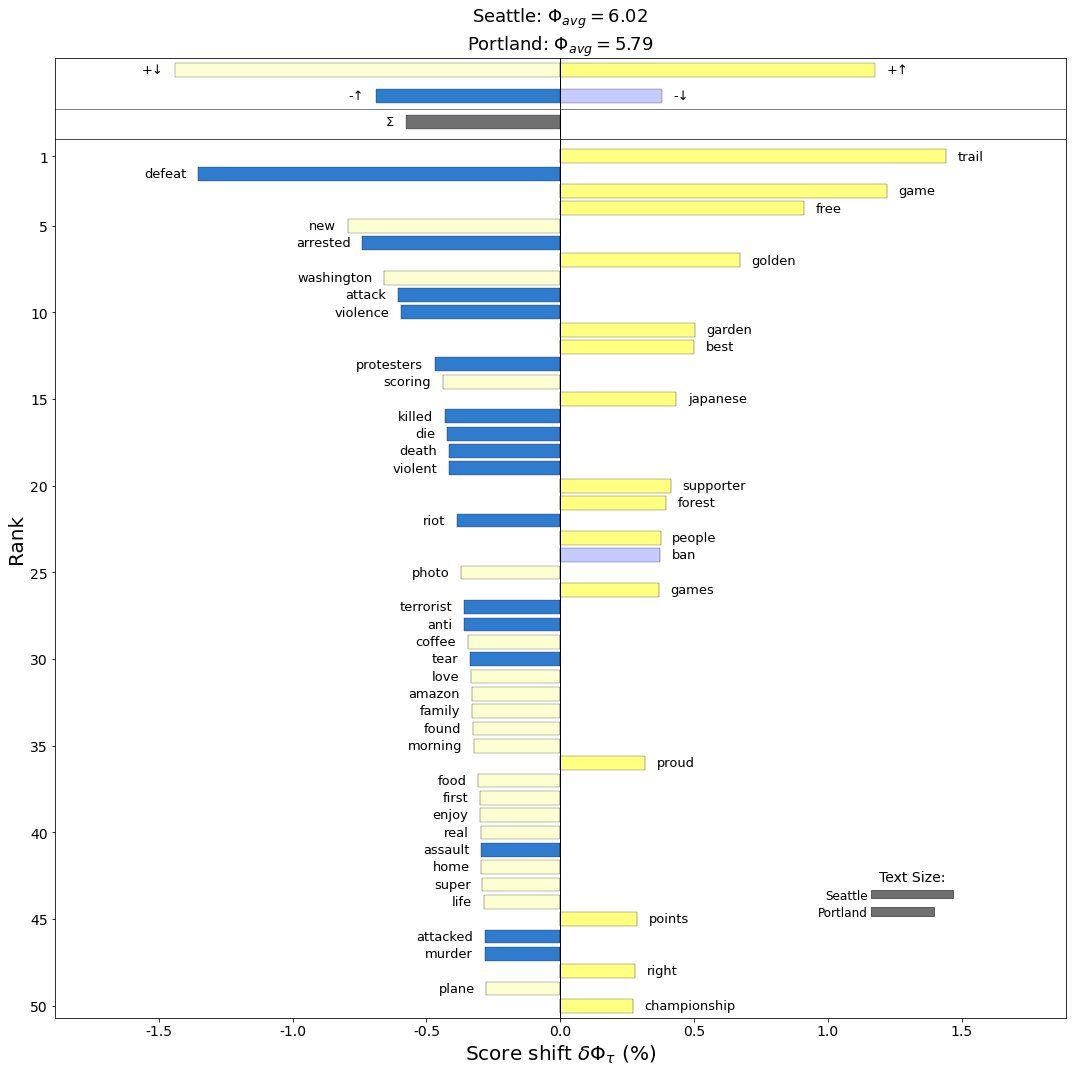

<AxesSubplot:title={'center':'Seattle: $\\Phi_{avg}=$6.02\nPortland: $\\Phi_{avg}=$5.79'}, xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [38]:
sentiment_shift = sh.WeightedAvgShift(type2freq_1 = seattle_counts,
                                type2freq_2= pdx_counts,
                                type2score_1='labMT_English',
                                stop_lens=[(4,6)]
                                )

sentiment_shift.get_shift_graph(system_names = ['Seattle', 'Portland'],  width=15, height=15, cumulative_inset=False, top_n =50)

## Top 50 Most Positive or Negative Words

In [41]:
Counter(sentiment_shift.get_shift_scores()).most_common()[:50]

[('trail', 0.014399886759119452),
 ('game', 0.012203006430331485),
 ('free', 0.009116102124117505),
 ('golden', 0.006703677966234926),
 ('garden', 0.005026833106735011),
 ('best', 0.004992919526180394),
 ('japanese', 0.004338021892258834),
 ('supporter', 0.004138619606061495),
 ('forest', 0.0039505005330587),
 ('people', 0.00375046949398002),
 ('ban', 0.0037374989496067336),
 ('games', 0.0036901707901581104),
 ('proud', 0.0031652012092757945),
 ('points', 0.002862149425021531),
 ('right', 0.0028019016371579977),
 ('championship', 0.0027005303322153885),
 ('poor', 0.0026770521549437515),
 ('seed', 0.0026377035918555038),
 ('good', 0.002623628289594665),
 ('peaceful', 0.002409331309434247),
 ('winning', 0.0023208677919859936),
 ('friend', 0.002200212363831468),
 ('like', 0.002156441216916837),
 ('war', 0.002155994814212005),
 ('moms', 0.0021394980436981637),
 ('dead', 0.0021343851342035636),
 ('university', 0.0020050005794176834),
 ('tax', 0.0020013192372178887),
 ('fresh', 0.00183710698

In [42]:
Counter(sentiment_shift.get_shift_scores()).most_common()[-50:]

[('killer', -0.0018723834533209507),
 ('criminal', -0.0019639161373764297),
 ('bad', -0.0019797332390505537),
 ('true', -0.001999268389778184),
 ('abandoned', -0.001999682821997524),
 ('paid', -0.0020569395933294774),
 ('sky', -0.002067723119676703),
 ('sunset', -0.0020761633278465756),
 ('missing', -0.0021227810320620447),
 ('special', -0.002197580127192632),
 ('children', -0.0022473238344339792),
 ('internet', -0.002383743080120143),
 ('wage', -0.00246292094767107),
 ('attacks', -0.002573447652384927),
 ('protest', -0.0025788672417218377),
 ('science', -0.0025982946400724405),
 ('plane', -0.0027594614097134745),
 ('murder', -0.002820071529745917),
 ('attacked', -0.002822316568282684),
 ('life', -0.002863707690166249),
 ('super', -0.00291061194465909),
 ('home', -0.0029534535793103453),
 ('assault', -0.0029608363932748733),
 ('real', -0.00297731421831583),
 ('enjoy', -0.0029892084230108864),
 ('first', -0.0030043517763055695),
 ('food', -0.003075248104022028),
 ('morning', -0.00323026

## 🛑  Interpretation & Analysis

What kind of claims, if any, could you make about the Seattle vs. Reddit posts based on the word shift graph of sentiment difference? Try to formulate it in one or two sentences.

In [ ]:
# Your claims here

## Compare Two Different Cities (Or Two Corpora)

In [34]:
ls ../reddit-data/

Ask-Men-Reddit-Submissions-1k.csv    LA-Reddit-Submissions-1k.csv
Ask-Women-Reddit-Submissions-1k.csv  Portland-Reddit-Submissions-1k.csv
Beijing-Reddit-Submissions-1k.csv    Rogue-One-Reddit-Submissions-1k.csv
Chicago-Reddit-Submissions-1k.csv    Seattle-Reddit-Submissions-1k.csv
Dune-Reddit-Submissions-1k.csv


In [52]:
city1_df = pd.read_csv('../reddit-data/Ask-Men-Reddit-Submissions-1k.csv', parse_dates=['date'])
city1_posts = city1_df['title'].to_list()

city1_counts = Counter()

for post in city1_posts:
    words = tokenize_words(post)
    city1_counts.update(words)

In [53]:
city2_df = pd.read_csv('../reddit-data/Ask-Women-Reddit-Submissions-1k.csv', parse_dates=['date'])
city2_posts = city2_df['title'].to_list()

city2_counts = Counter()

for post in city2_posts:
    words = tokenize_words(post)
    city2_counts.update(words)

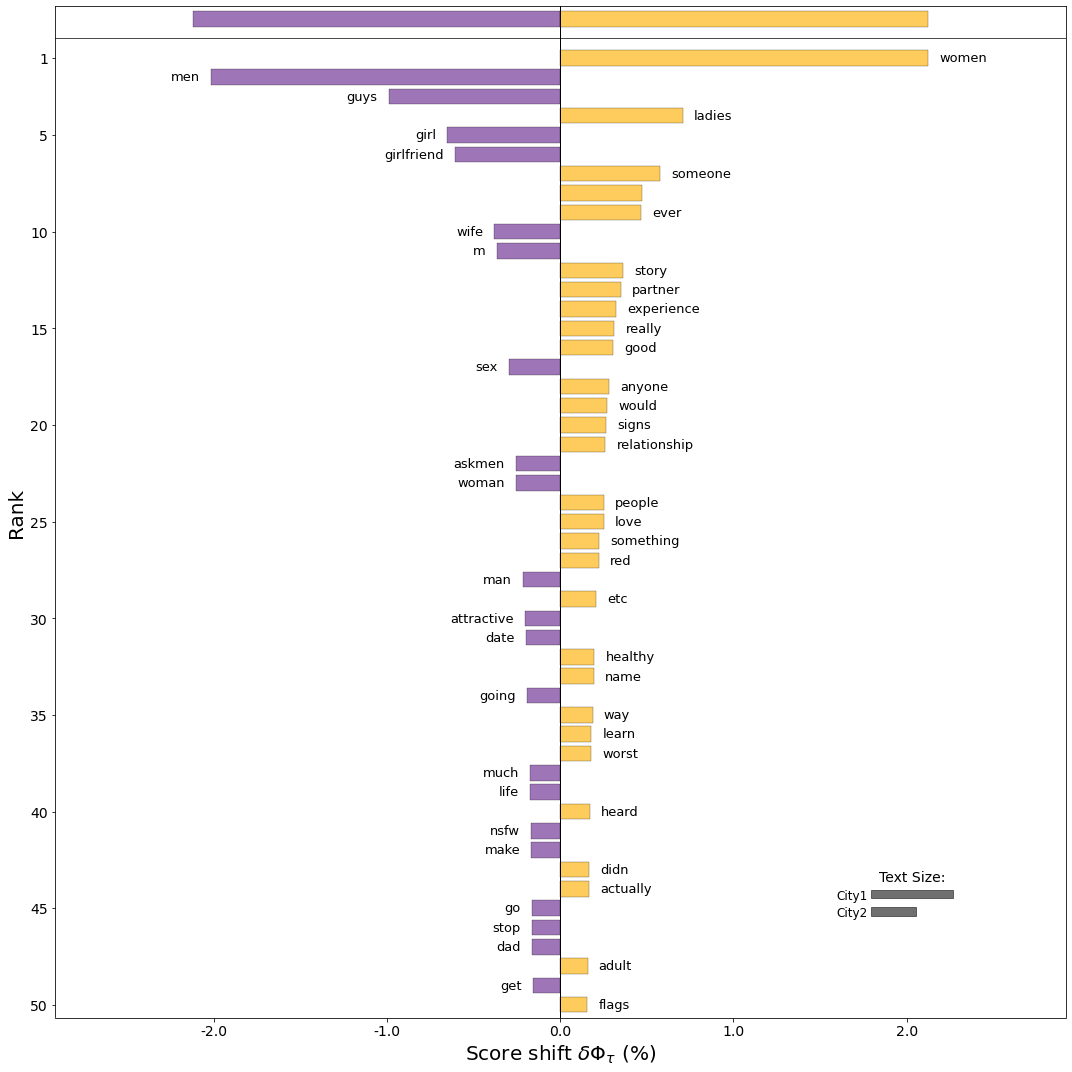

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [54]:
proportion_shift = sh.ProportionShift(type2freq_1 = city1_counts,
                                        type2freq_2= city2_counts)

proportion_shift.get_shift_graph(system_names = ['City1', 'City2'],  width=15, height=15, cumulative_inset=False,  top_n = 50)